In [ ]:
import pandas as pd
col_names=["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age","label"]
pima=pd.read_csv("/content/diabetes.csv",header=1,names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
from sklearn.model_selection import train_test_split
feature_cols=["pregnant","insulin","bmi","age","glucose","bp","pedigree"]
X=pima[feature_cols]
y=pima.label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=16)
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,1,0,26.6,31,85,66,0.351
1,8,0,23.3,32,183,64,0.672
2,1,94,28.1,21,89,66,0.167
3,0,168,43.1,33,137,40,2.288
4,5,0,25.6,30,116,74,0.201


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=16)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[115,   8],
       [ 30,  39]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 427.9555555555555, 'Predicted label')

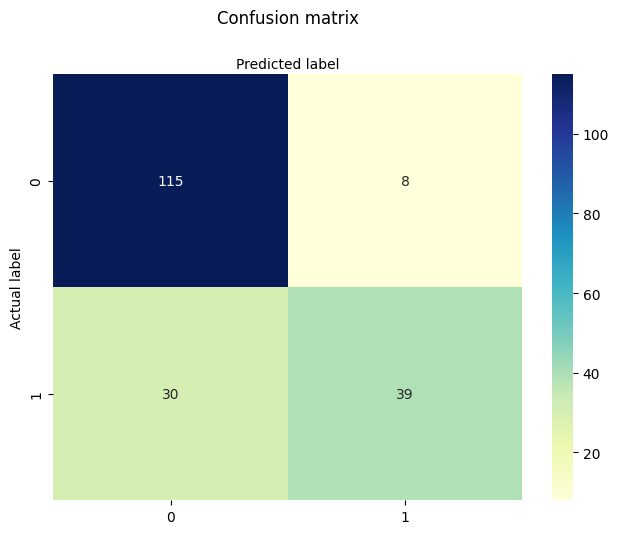

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')